<a href="https://colab.research.google.com/github/shaja-asm/EMLEC/blob/dev/Assignment_I_Completed.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Assignment: Detect Hand Guestures**


# Requirement:  
* Build a Computer Vision Application to Detect Hand Gestures.
* Focus is on 3 Gestures. Rock, Paper, Scissor


# INSTRUCTIONS:
* Make your own copy of the Notebook before starting the assignment.
  **File** -> **save a copy in Drive**

* Fill the place holders in the notebook which are indicated with the 'FILL:' Key word.

## Download & Extract Rock-Paper-Scissor Datasets

Link to the dataset: https://www.tensorflow.org/datasets/catalog/rock_paper_scissors



In [1]:
!mkdir ./tmp

Train Dataset

In [2]:
!wget --no-check-certificate \
    https://storage.googleapis.com/download.tensorflow.org/data/rps.zip \
    -O ./tmp/rps.zip


--2024-07-07 09:07:37--  https://storage.googleapis.com/download.tensorflow.org/data/rps.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.141.207, 142.251.2.207, 74.125.137.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.141.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 200682221 (191M) [application/zip]
Saving to: ‘./tmp/rps.zip’

./tmp/rps.zip       100%[===================>] 191.38M   114MB/s    in 1.7s    

2024-07-07 09:07:39 (114 MB/s) - ‘./tmp/rps.zip’ saved [200682221/200682221]



Validation Dataset

In [3]:
!wget --no-check-certificate \
    https://storage.googleapis.com/download.tensorflow.org/data/rps-test-set.zip \
    -O ./tmp/rps-test-set.zip

--2024-07-07 09:07:43--  https://storage.googleapis.com/download.tensorflow.org/data/rps-test-set.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.141.207, 142.251.2.207, 74.125.137.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.141.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 29516758 (28M) [application/zip]
Saving to: ‘./tmp/rps-test-set.zip’

./tmp/rps-test-set. 100%[===================>]  28.15M  78.9MB/s    in 0.4s    

2024-07-07 09:07:43 (78.9 MB/s) - ‘./tmp/rps-test-set.zip’ saved [29516758/29516758]



## Use Zipfile to extract the files

In [4]:
import zipfile
import os

In [5]:
def extract_file(src, dest):
  # opening the zip file in READ mode
  with zipfile.ZipFile(src, 'r') as zip:
      # extracting all the files
      print(f'Extracting all the files from {src}...')
      zip.extractall(dest)
      print('Done!')

In [6]:
extract_file(src='./tmp/rps.zip', dest='./data')
extract_file(src='./tmp/rps-test-set.zip', dest='./data')

Extracting all the files from ./tmp/rps.zip...
Done!
Extracting all the files from ./tmp/rps-test-set.zip...
Done!


In [7]:
def get_image_counts(parent_folder, dataset_name):
  rock_dir = os.path.join(parent_folder, 'rock')
  paper_dir = os.path.join(parent_folder, 'paper')
  scissors_dir = os.path.join(parent_folder, 'scissors')

  print(f'total {dataset_name} rock images: {len(os.listdir(rock_dir))}')
  print(f'total {dataset_name} paper images: {len(os.listdir(paper_dir))}')
  print(f'total {dataset_name} scissors images: {len(os.listdir(scissors_dir))}')

In [9]:
get_image_counts(parent_folder='./data/rps', dataset_name='training')

total training rock images: 840
total training paper images: 840
total training scissors images: 840


In [10]:
get_image_counts(parent_folder='./data/rps-test-set', dataset_name='testing')

total testing rock images: 124
total testing paper images: 124
total testing scissors images: 124


# Training Pipeline Implementation

## Import Required Libraries

In [11]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

### 2.1. Visualize Data

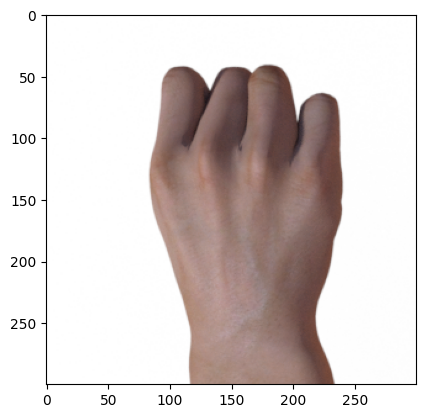

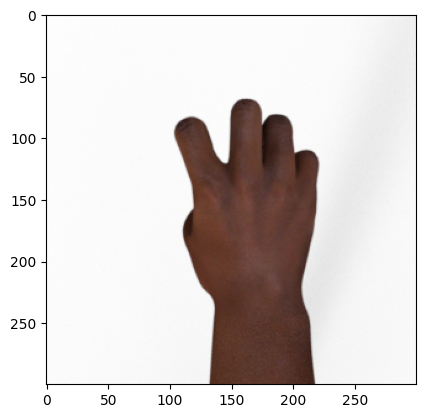

(300, 300, 3)


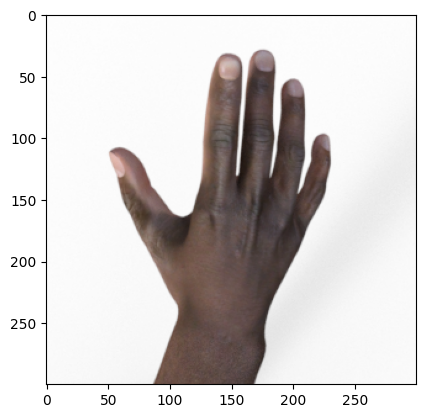

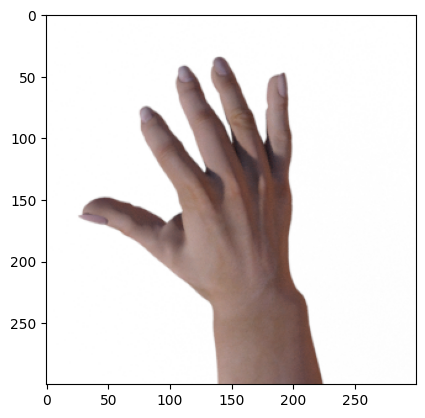

(300, 300, 3)


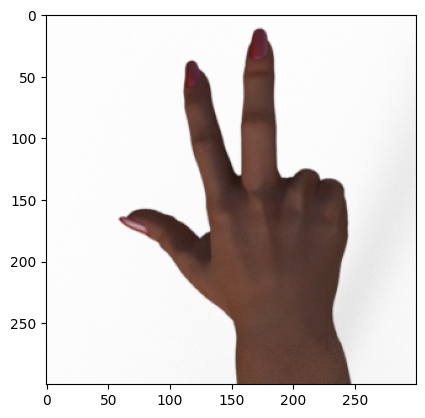

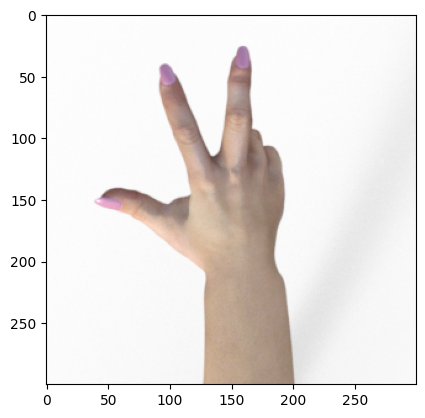

(300, 300, 3)


In [12]:
for label in ['rock', 'paper', 'scissors']:
  im_folder = f'./data/rps/{label}'
  im_count = 2
  for im_name in  os.listdir(im_folder)[:im_count]:
      im_path = os.path.join(im_folder, im_name)
      img = Image.open(im_path).convert('RGB')
      img = np.asarray(img)
      # plt.title(f'Label: { y_test[i]}')
      plt.imshow(img)
      plt.show()
  print(img.shape)

# Use Image Data Generator to Pre-process and to Feed data to the training pipeline

## Requirement:
### 1.Resize Images to (128, 128)
### 2.Rescale images to (0 - 1.) range
### 3. Use batch_size: 64
### 4.Augment only the training data.
### 5. Augmentations to be used,
        rotation_range=40
        width_shift_range=0.2
        height_shift_range=0.2
        shear_range=0.2
        zoom_range=0.2
        horizontal_flip=True
        fill_mode='nearest'
    

In [32]:
from keras.preprocessing.image import ImageDataGenerator

TRAINING_DIR = "./data/rps/"
training_datagen = ImageDataGenerator(
      rescale=1.0/255.0,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

VALIDATION_DIR = "./data/rps-test-set/"
validation_datagen = ImageDataGenerator(rescale=1.0/255.0)

train_generator = training_datagen.flow_from_directory(
    TRAINING_DIR,
    batch_size=64,
    class_mode='categorical',
    target_size=(128, 128))

validation_generator = validation_datagen.flow_from_directory(
    VALIDATION_DIR,
    batch_size=64,
    class_mode='categorical',
    target_size=(128, 128))

Found 2520 images belonging to 3 classes.
Found 372 images belonging to 3 classes.


## Create a model according to the below configuration.
### Need to have 4 convolutional blocks. Use **ReLU** activation for all convolution layers.
  first convolution block:

    Kernal Shape= (3,3)
    Number of Filters 64
  
  second convolution block:

    Kernal Shape= (3,3)
    Number of Filters 64

  third convolution block:

    Kernal Shape= (3,3)
    Number of Filters 128

  fourth convolution block:

    Kernal Shape= (3,3)
    Number of Filters 128

### Need to have 2 Dense Layers. Use **ReLU** activation for the first Dense layer. Use a suitable activation function for the Dense final layer.

  first dense layer:

    Number of Nodes= 512
    Activation Function: ReLU
    
    Note: It is advisable to use dropout with a suitable drop probability for the flattened input; just before feeding into the first dense layer.

  second (final) dense layer:

    Number of Nodes: Decide based on the Task
    Activation Function: Decide based on the Task

In [46]:
from tensorflow.keras.regularizers import l2
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(512, activation='relu', kernel_regularizer=l2(0.01)),
    tf.keras.layers.Dense(3, activation='softmax')
])

model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_24 (Conv2D)          (None, 126, 126, 64)      1792      
                                                                 
 max_pooling2d_24 (MaxPooli  (None, 63, 63, 64)        0         
 ng2D)                                                           
                                                                 
 conv2d_25 (Conv2D)          (None, 61, 61, 64)        36928     
                                                                 
 max_pooling2d_25 (MaxPooli  (None, 30, 30, 64)        0         
 ng2D)                                                           
                                                                 
 conv2d_26 (Conv2D)          (None, 28, 28, 128)       73856     
                                                                 
 max_pooling2d_26 (MaxPooli  (None, 14, 14, 128)      

## Class names order

In [35]:
class_names = sorted(os.listdir('/content/data/rps'))

## Define a suitable preprocessing function to,
1. resize the given image to the expected input size.
2. Normalize images from [0, 255] to [0, 1] range.
3. Make sure to expand the first dimension before feeding the image to the NN


In [47]:
def im_preprocess(img_path, display=False):
    img = Image.open(img_path).convert('RGB')
    img = img.resize((128, 128))

    if display:
        plt.imshow(img)
        plt.axis('off')
        plt.show()

    img = np.array(img)
    img = img / 255.0
    img = np.expand_dims(img, axis=0)
    return img


## Predict before training.

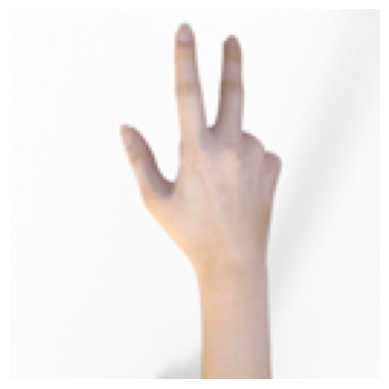

In [48]:
im_path = './data/rps/scissors/scissors01-004.png'
img = im_preprocess(img_path=im_path, display=True)

In [49]:
pred_b4_training = model.predict(img)
print(pred_b4_training)
print('\n Prediction before Training:', class_names[np.argmax(pred_b4_training)])

1/1 [==============================] - 0s 75ms/step
[[0.3511147  0.31883603 0.3300493 ]]

 Prediction before Training: paper


## Train the model.

### Define tensorboard_callback

In [50]:
# Use tensorboard_callback for training.
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir="./logs")

In [51]:
from tensorflow.keras.optimizers import Adam
model.compile(optimizer=Adam(learning_rate=1e-3), loss='categorical_crossentropy', metrics=['accuracy'])

In [52]:
hist = model.fit(
    train_generator,
    epochs=25,
    validation_data=validation_generator,
    callbacks=[tensorboard_callback],
    verbose=1
)

Epoch 1/25
40/40 [==============================] - 21s 456ms/step - loss: 3.7037 - accuracy: 0.3433 - val_loss: 1.1974 - val_accuracy: 0.5941
Epoch 2/25
40/40 [==============================] - 20s 492ms/step - loss: 1.0123 - accuracy: 0.5448 - val_loss: 0.7412 - val_accuracy: 0.6263
Epoch 3/25
40/40 [==============================] - 18s 462ms/step - loss: 0.8348 - accuracy: 0.6710 - val_loss: 0.4527 - val_accuracy: 0.9247
Epoch 4/25
40/40 [==============================] - 20s 495ms/step - loss: 0.6572 - accuracy: 0.7857 - val_loss: 0.2962 - val_accuracy: 0.9731
Epoch 5/25
40/40 [==============================] - 19s 477ms/step - loss: 0.6028 - accuracy: 0.8286 - val_loss: 0.3670 - val_accuracy: 0.9597
Epoch 6/25
40/40 [==============================] - 20s 513ms/step - loss: 0.5433 - accuracy: 0.8591 - val_loss: 0.3062 - val_accuracy: 0.9624
Epoch 7/25
40/40 [==============================] - 21s 526ms/step - loss: 0.4362 - accuracy: 0.8948 - val_loss: 0.2429 - val_accuracy: 0.9731

## Evaluate trained Model

Evaluate on test data
6/6 [==============================] - 1s 195ms/step - loss: 0.1615 - accuracy: 0.9677
test loss, test acc: [0.16146667301654816, 0.9677419066429138]


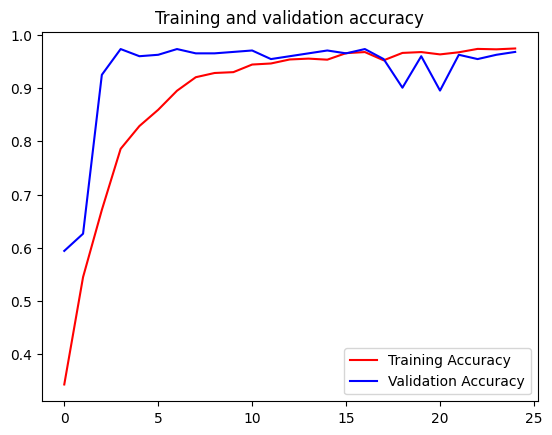

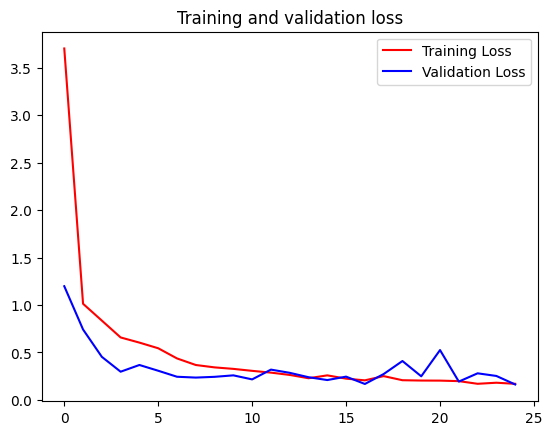

In [53]:
print("Evaluate on test data")
results = model.evaluate(validation_generator)
print("test loss, test acc:", results)

acc = hist.history['accuracy']
val_acc = hist.history['val_accuracy']
loss = hist.history['loss']
val_loss = hist.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label="Training Accuracy")
plt.plot(epochs, val_acc, 'b', label="Validation Accuracy")
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'r', label="Training Loss")
plt.plot(epochs, val_loss, 'b', label="Validation Loss")
plt.title('Training and validation loss')
plt.legend()

plt.show()

### Save Trained Model

In [54]:
model.save("rps_model.h5")

### Load Trained Model

In [55]:
trained_model = keras.models.load_model('rps_model.h5')

## Run Inference after training

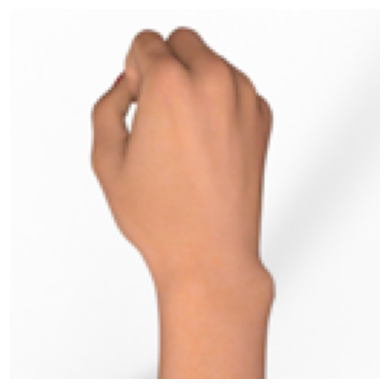

In [56]:
im_path = '/content/data/rps-test-set/rock/testrock01-05.png'
img = im_preprocess(img_path=im_path, display=True)

In [57]:
pred_after_training = trained_model.predict(img)
print(pred_after_training)
print('\n Prediction after Training:', class_names[np.argmax(pred_after_training)])

1/1 [==============================] - 0s 78ms/step
[[7.1307900e-04 9.9818867e-01 1.0981954e-03]]

 Prediction after Training: rock


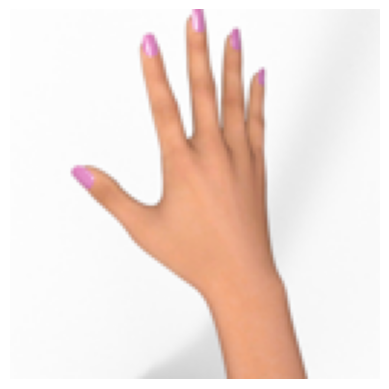

1/1 [==============================] - 0s 20ms/step
[[9.9654913e-01 1.8984577e-04 3.2609759e-03]]

 Prediction after Training: paper


In [58]:
im_path = '/content/data/rps-test-set/paper/testpaper01-07.png'
img = im_preprocess(img_path=im_path, display=True)

pred_after_training = trained_model.predict(img)
print(pred_after_training)
print('\n Prediction after Training:', class_names[np.argmax(pred_after_training)])

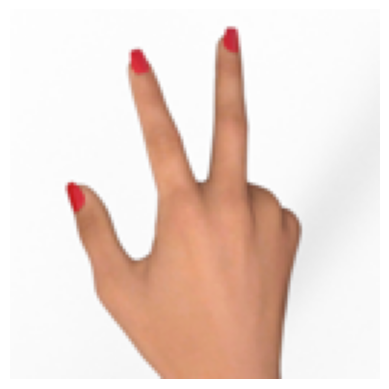

1/1 [==============================] - 0s 25ms/step
[[0.00542619 0.00346209 0.9911117 ]]

 Prediction after Training: scissors


In [59]:
im_path = '/content/data/rps-test-set/scissors/testscissors01-10.png'
img = im_preprocess(img_path=im_path, display=True)

pred_after_training = trained_model.predict(img)
print(pred_after_training)
print('\n Prediction after Training:', class_names[np.argmax(pred_after_training)])

## Visualize training with tensorboard.

In [60]:
# Load the TensorBoard notebook extension
%load_ext tensorboard

In [61]:
%tensorboard --logdir './logs'

<IPython.core.display.Javascript object>